In [4]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_ds="/kaggle/input/gender-classification-dataset/Training"
test_ds="/kaggle/input/gender-classification-dataset/Validation"

# Data preprocessing
****

In [7]:
root_path = "/kaggle/input/gender-classification-dataset/Training/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [8]:
os.listdir('/kaggle/input/gender-classification-dataset/Training')

['female', 'male']

In [9]:
import plotly.express as px

In [10]:
fig = px.pie(names=class_names, values=class_dis,
             title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [11]:
valid_path = "/kaggle/input/gender-classification-dataset/Validation/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 


valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [13]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [14]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [15]:
img= train_generator[0]
print(img)

(array([[[[ 32.        ,  26.        ,  14.        ],
         [ 32.        ,  26.        ,  14.        ],
         [ 32.        ,  26.        ,  14.        ],
         ...,
         [ 35.        ,  29.        ,  29.        ],
         [ 35.        ,  29.        ,  29.        ],
         [ 35.        ,  29.        ,  29.        ]],

        [[ 32.        ,  26.        ,  14.        ],
         [ 32.        ,  26.        ,  14.        ],
         [ 32.        ,  26.        ,  14.        ],
         ...,
         [ 35.        ,  29.        ,  29.        ],
         [ 35.        ,  29.        ,  29.        ],
         [ 35.        ,  29.        ,  29.        ]],

        [[ 35.474842  ,  29.47484   ,  15.73742   ],
         [ 35.474842  ,  29.47484   ,  15.73742   ],
         [ 35.474842  ,  29.47484   ,  15.73742   ],
         ...,
         [ 32.39387   ,  28.13129   ,  27.262579  ],
         [ 32.39387   ,  28.13129   ,  27.262579  ],
         [ 32.39387   ,  28.13129   ,  27.262579  ]]

In [16]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [17]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


In [18]:
print(len(train_generator))
print(len(test_ds))

1470
54


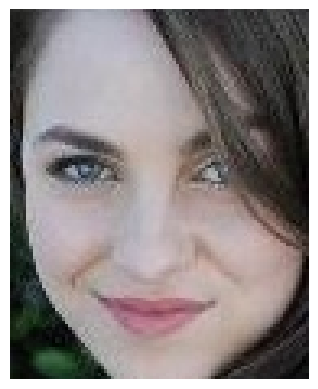

In [19]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/gender-classification-dataset/Training/female/131422.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
from keras.layers import MaxPool2D

# Build VVG_16 Model

In [21]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
       

In [22]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [23]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [28]:
history =model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
1470/1470 [==============================] - 1099s 735ms/step - loss: 0.3539 - accuracy: 0.8349 - val_loss: 0.1523 - val_accuracy: 0.9376
Epoch 2/10
1470/1470 [==============================] - 809s 550ms/step - loss: 0.1579 - accuracy: 0.9427 - val_loss: 0.1070 - val_accuracy: 0.9594
Epoch 3/10
1470/1470 [==============================] - 805s 548ms/step - loss: 0.1345 - accuracy: 0.9518 - val_loss: 0.0936 - val_accuracy: 0.9670
Epoch 4/10
1470/1470 [==============================] - 805s 547ms/step - loss: 0.1241 - accuracy: 0.9556 - val_loss: 0.0896 - val_accuracy: 0.9665
Epoch 5/10
1470/1470 [==============================] - 811s 552ms/step - loss: 0.1158 - accuracy: 0.9585 - val_loss: 0.0870 - val_accuracy: 0.9674
Epoch 6/10
1470/1470 [==============================] - 804s 547ms/step - loss: 0.1114 - accuracy: 0.9613 - val_loss: 0.0950 - val_accuracy: 0.9634
Epoch 7/10
1470/1470 [==============================] - 810s 551ms/step - loss: 0.1045 - accuracy: 0.9633 - val

In [30]:
n_categories = len(os.listdir('/kaggle/input/gender-classification-dataset/Validation'))# number of categories print(n_categories)

In [32]:
n_categories

2

In [33]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.353864,0.834883,0.152279,0.937591
1,0.157945,0.942734,0.107032,0.959396
2,0.134505,0.951839,0.093570,0.967036
3,0.124058,0.955647,0.089640,0.966521
4,0.115796,0.958497,0.087013,0.967379


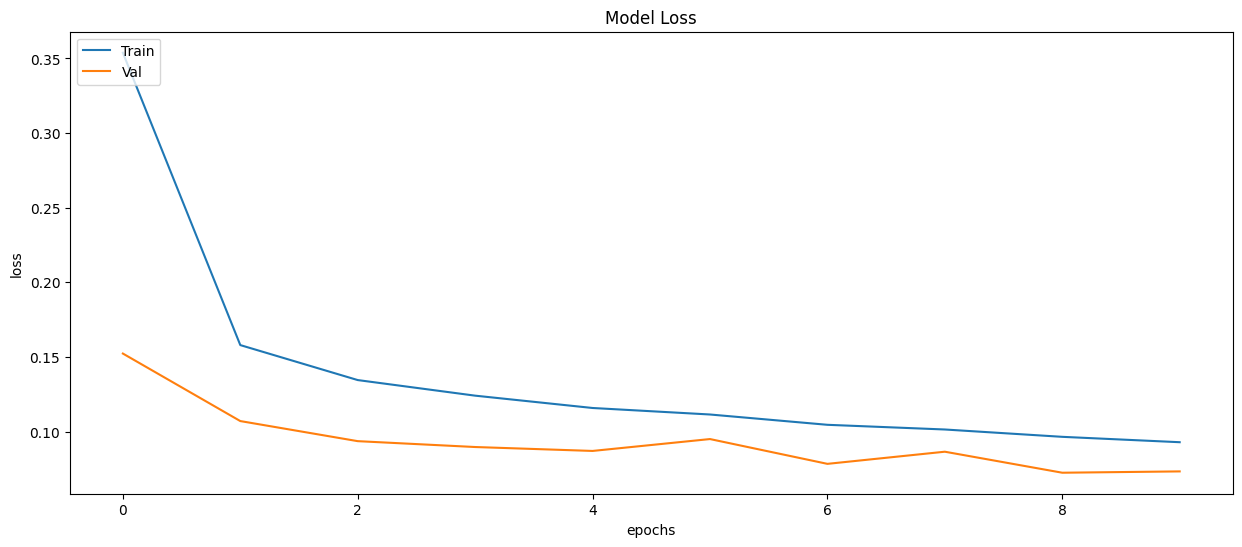

In [34]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

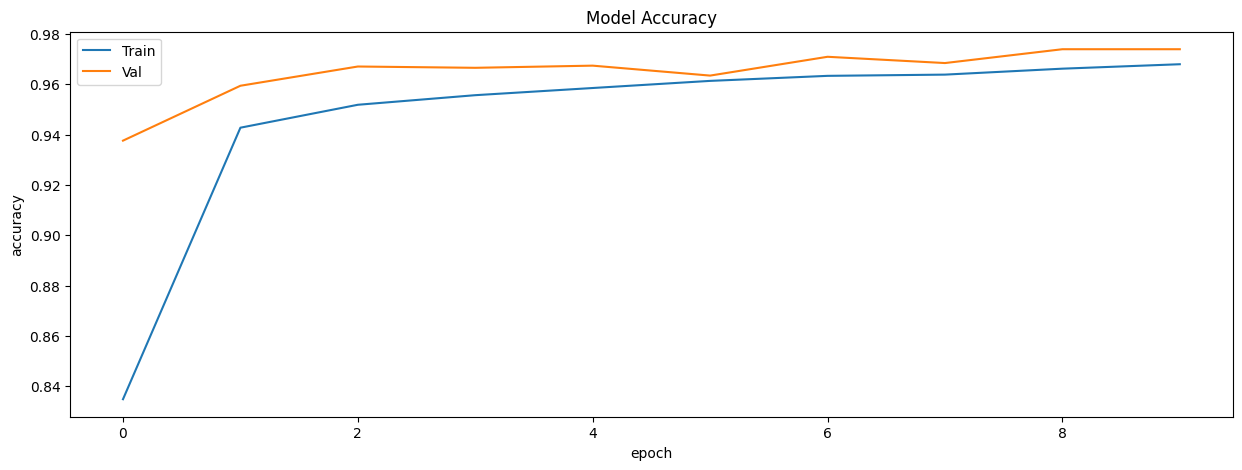

In [35]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [36]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

365/365 [==============================] - 48s 130ms/step


In [38]:
results =model.evaluate(test_generator)

365/365 [==============================] - 49s 135ms/step - loss: 0.0733 - accuracy: 0.9739


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5841
           1       0.98      0.97      0.97      5808

    accuracy                           0.97     11649
   macro avg       0.97      0.97      0.97     11649
weighted avg       0.97      0.97      0.97     11649

